# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**DATOS**

*Cualitativos*
1. Barrio en el que se encuntra la propiedad
2. Disponibilidad de parqueadero
3. Disponibilidad de seguridad privada
4. tipo de propiedad
5. Disponibilidad de zonas verdes
6. ascensor
7. iluminación
8. Materiales de construcción

*Cuantitativos*
1. metros cuadrados de la propiedad
2. número de cuartos
3. número de baños
4. distancia a transporte público
5. antiguedad de la propiedad
6. número de pisos de la propiedad
7. número de puntos de electricidad


---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
#importar Numpy, Pandas, Matplot, 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
# Carga del dataset
datos = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

# Se cambian los nombres de algunas columnas
datos = datos.rename(columns={'l1': 'pais', 'l2': 'region', 'l3': 'barrio'})

# Para ver algunas características generales
datos.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [4]:
# Tamaño del dataset 
print('Número de filas: ', datos.shape[0])

print('Número de columnas: ', datos.shape[1])


#Imprime 5 primeras instancias
print("Las 5 primeras instancias son:")
datos.head(5)

Número de filas:  146660
Número de columnas:  19
Las 5 primeras instancias son:


,start_date,end_date,created_on,lat,lon,pais,region,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [117]:
# Muestra el conteo de valores faltantes por cada columna
valores_faltantes = datos.isnull().sum()
valores_faltantes

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
pais                   0
region                 0
barrio                 0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [118]:
#Tipos de propiedades 

print('Hay', len(pd.unique(datos['property_type'])), 'tipos de propiedades.')
print('Los tipos de propiedades en el dataset son:')
print(pd.unique(datos['property_type']))

print('El número de propiedades de cada clase es:')
datos['property_type'].value_counts()

Hay 10 tipos de propiedades.
Los tipos de propiedades en el dataset son:
['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
El número de propiedades de cada clase es:


Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

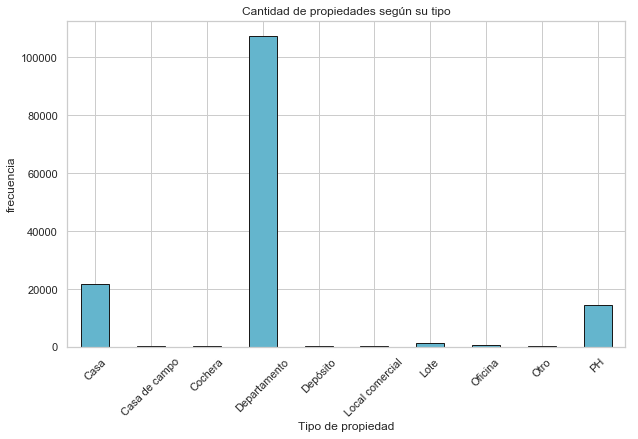

In [119]:
# Frecuencias por tipo de propiedad
# Par definir el tamaño de la figura
plt.figure(figsize = (10,6))
# Para definir el estilo de la gráfica con el color de fondo
sns.set_style('whitegrid')
# Los datos seleccionados para graficar la frecuencia según el tipo de propiedad
datos.groupby('property_type')['property_type'].count().plot(kind = 'bar', color = 'c', edgecolor = 'k')
# Detalles de los ejes y títulos
plt.xticks(rotation = 45)
plt.title('Cantidad de propiedades según su tipo')
plt.xlabel('Tipo de propiedad')
plt.ylabel('frecuencia')
plt.show()

Como se ve en la gráfica, los tres tipos de propiedad más representados son Casa, PH y Departamento.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [120]:
# Dónde se ubican estas propiedades - Primero se muestran cantidad de propiedades por región
# Primero se mira el número de propiedades por cada región antes de graficar esta información
datos['region'].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: region, dtype: int64

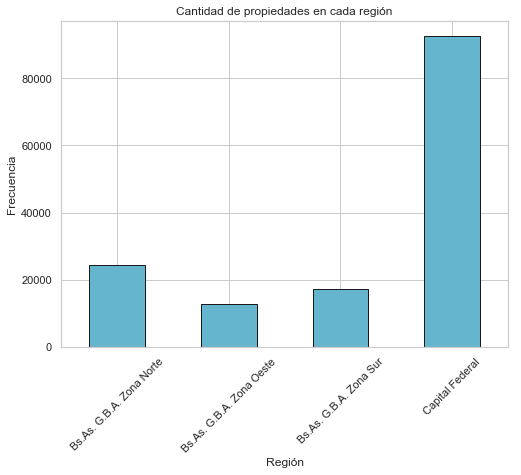

In [121]:
# Dónde se ubican estas propiedades - Primero se muestran cantidad de propiedades por región

#Para definir el estilo del gráfico con fondo blanco
sns.set_style('whitegrid')

#Datos seleccionados para graficar la frecuencia de propiedades por región
plt.figure(figsize = (8, 6))
datos.groupby('region')['region'].count().plot(kind = 'bar', edgecolor = 'k', color = 'c')

#Detalles de los ejes y títulos
plt.xticks(rotation = 45)
plt.title('Cantidad de propiedades en cada región')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.show()


En el gráfico se ve que la mayoría de las propiedades se encuentran en Capital Federal.

In [122]:
# Distribución de propiedades por barrio - Muestra el número de propiedades en cada barrio

datos['barrio'].value_counts()

Palermo                 13073
Tigre                    8718
Almagro                  7527
Belgrano                 6935
Caballito                6650
Villa Crespo             6494
Recoleta                 5917
La Plata                 4354
La Matanza               3757
Pilar                    3709
Lomas de Zamora          3599
Villa Urquiza            3339
Vicente López            3251
Tres de Febrero          3240
Barrio Norte             3229
Balvanera                2992
Flores                   2556
Morón                    2312
San Isidro               2265
Nuñez                    1978
Quilmes                  1853
Lanús                    1839
General San Martín       1796
Puerto Madero            1757
Colegiales               1599
San Cristobal            1537
San Miguel               1450
Villa Devoto             1437
Escobar                  1419
Avellaneda               1370
                        ...  
Centro / Microcentro      561
Villa Lugano              516
Parque Pat

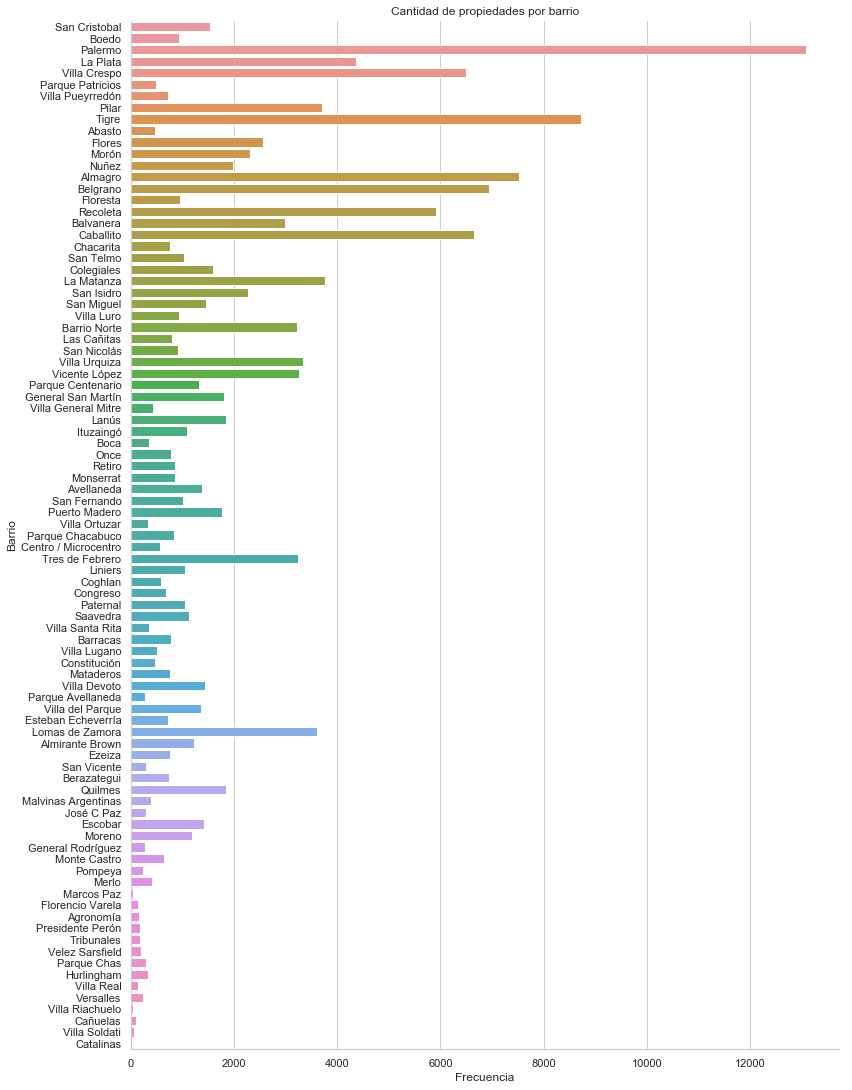

In [123]:
# La anterior tabla es un poco engorrosa de ver, así que esa misma información se tiene graficada: 
sns.catplot(data = datos, y = 'barrio', kind = 'count', height = 15, aspect=.8);
plt.title('Cantidad de propiedades por barrio');
plt.xlabel('Frecuencia');
plt.ylabel('Barrio');

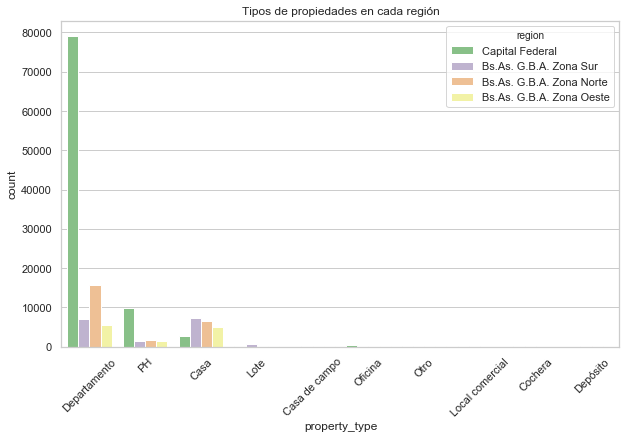

In [124]:
# Tipo de propiedad en cada región - Combinando la información del tipo de propiedad y ubicación se tiene el siguiente gráfico:
# Define el tamaño del gráfico:
plt.figure(figsize = (10,6))

#Para definir el estilo del gráfico con fondo blanco
sns.set_style('whitegrid')

# Detalles y tipo de gráfico 
sns.countplot(data = datos, x='property_type', hue = 'region', palette = 'Accent')
plt.title('Tipos de propiedades en cada región' )
plt.xticks(rotation=45)
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [5]:
# Nuevo dataframe con los datos de la región con más propiedades (Capital Federal) y los tres tipos de propiedades más abundantes (casa, departamento y PH)
capital = datos[datos.region.isin(['Capital Federal']) & datos.property_type.isin(['Casa', 'Departamento', 'PH'])]
print('Las dimensiones del nuevo Dataframe son:', capital.shape)
capital.head()

Las dimensiones del nuevo Dataframe son: (91485, 19)


,start_date,end_date,created_on,lat,lon,pais,region,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

### Estadísticas descriptivas

In [126]:
# Estadísticos descriptivos de los datos
capital.drop(columns = 'price').describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000


Como se puede ver con los estadísticos, existen valores muy altos en los máximos de habitaciones, cuartos y baños que superan por mucho la media. Estos podrían alterar el análisis.

### Outlayers

#### Superficie total
el rango de superficie total es muy amplio y esto puede afectar el análisis, por lo que es importante filtrarlo. También se debe hacer un control de calidad de los datos para asegurar que haya consistencia en que la superficie cuvierta no sobrepase la total.

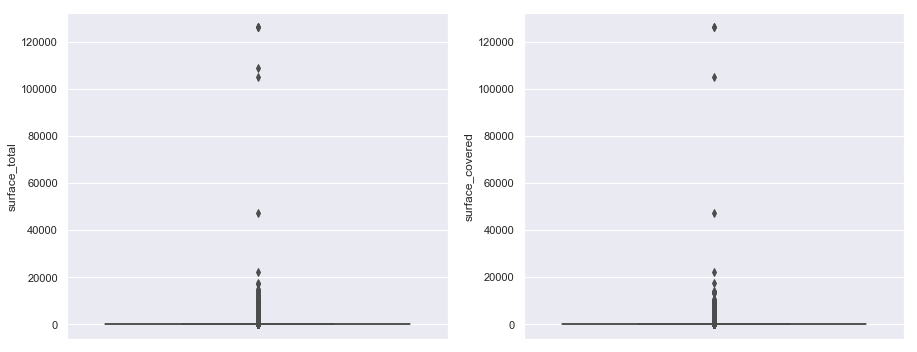

In [8]:
# Boxplot de superficie total
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data = capital, y = 'surface_total');
plt.subplot(1,2,2)
sns.boxplot(data = capital, y = 'surface_covered');

Como se puede ver en la imágen, existen muchos datos atípicos que impiden la visualización de la distribución de los datos de superficie total y superficie cuvierta. Además los datos extremos pueden afectar el análisis del dataset por lo que es pertinente removerlos de la siguiente forma

In [9]:
#Se define una función que elimine los datos atípicos por el método del rango intercuartílico. 
def elim_outliers(data):
    q1 = datos['surface_total'].quantile(0.25)           #se define le primer cuartil
    q3 = datos['surface_total'].quantile(0.75)           #se define el tercer cuartil
    riq = q3 - q1                                        #se define el rango intercuartílico
    
    lim_inferior = q1 - (riq * 1.5)                      #se define el límite inferior a partir del cual se descartan los datos
    lim_superior = q3 + (riq * 1.5)                      #se define el límite superior a partir del cual se descartan los datos
    
    return np.where((data > lim_inferior) & (data < lim_superior))    #Devuelve los ítems que se encuentran entre el límite inferior y el superior


In [10]:
# Se aplica la función al set de datos y se guarda en una nueva variable
capital = capital.iloc[elim_outliers(capital.surface_total)]

In [14]:
#Para asegurarse que la función corrió correctamente se imprimen las nuevas dimensiones, que deben ser menos a las anteriores,
# y las 5 primeras instancias
print('Las nuevas dimensiones del Dataframe son:', capital.shape)
capital.head()

Las nuevas dimensiones del Dataframe son: (79277, 19)


,start_date,end_date,created_on,lat,lon,pais,region,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


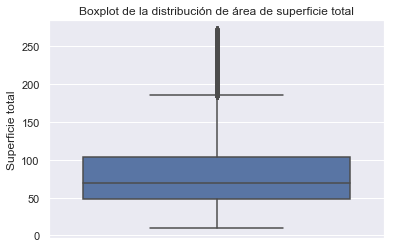

In [15]:
# Graficando de nuevo la distribución del área de superficie total se tiene la siguiente gráfica de cajas

sns.boxplot(data = capital, y = 'surface_total');
plt.title('Boxplot de la distribución de área de superficie total')
plt.ylabel('Superficie total');

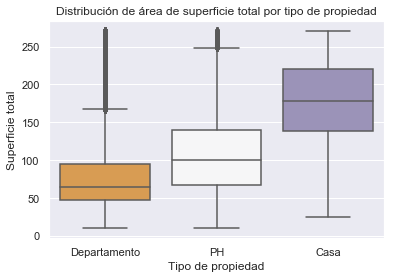

In [16]:
# separando la superficie total según el tipo de propiedad se tiene:
sns.boxplot(data = capital, x = 'property_type', y = 'surface_total', palette = 'PuOr');
plt.title('Distribución de área de superficie total por tipo de propiedad')
plt.ylabel('Superficie total');
plt.xlabel('Tipo de propiedad');

In [17]:
# Control de calidad: para asegurarse que los datos sean correctos y consistentes, se comprueba que la superficie 
# cuvierta no sea mayor a la superficie total
for i in capital:
    if 'superficie_cuvierta' >= 'superficie_total':
        'superficie_cuvierta' == 'superficie_total'

In [18]:
# Para comprobar la consistencia de los datos se prueba si es verdad que algún ítem no cumple la condición de que 
# la superficie cuvierta sea menor o igual a la total
('surface_covered' > 'surface_total')

False

#### Rooms, Bedrooms, Bathrooms

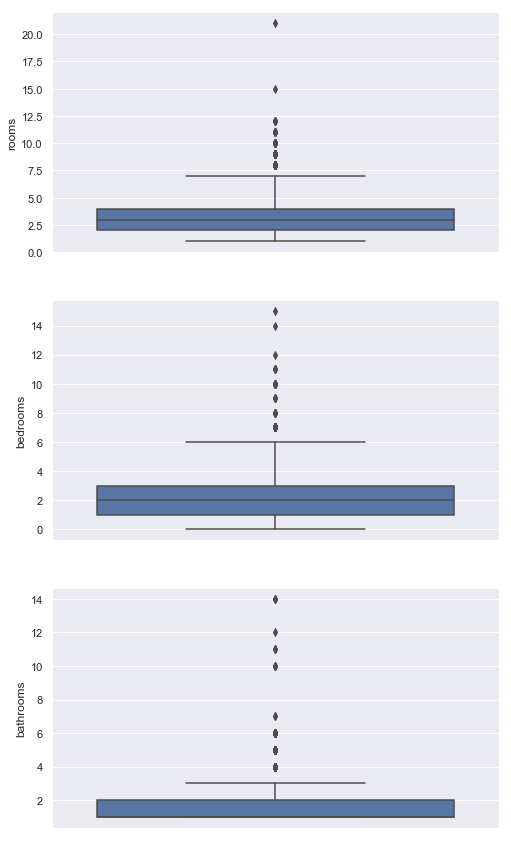

In [19]:
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
sns.boxplot(data = capital, y = 'rooms');
plt.subplot(3,1,2)
sns.boxplot(data = capital, y = 'bedrooms');
plt.subplot(3,1,3)
sns.boxplot(data = capital, y = 'bathrooms')

In [31]:
#Se define una función que elimine los datos atípicos por el método del rango intercuartílico. 

def elim_outliers(data):
    q1 = data.quantile(0.25)           #se define le primer cuartil
    q3 = data.quantile(0.75)           #se define el tercer cuartil
    riq = q3 - q1                                        #se define el rango intercuartílico

    lim_inferior = q1 - (riq * 1.5)                      #se define el límite inferior a partir del cual se descartan los datos
    lim_superior = q3 + (riq * 1.5)                      #se define el límite superior a partir del cual se descartan los datos

    return np.where((data > lim_inferior) & (data < lim_superior))    #Devuelve los ítems que se encuentran entre el límite inferior y el superior


In [33]:
# Se aplica la función al set de datos en la columna rooms y se guarda en una nueva variable
capital_1 = capital.iloc[elim_outliers(capital.rooms)]

In [39]:
#Para asegurarse que la función corrió correctamente se imprimen las nuevas dimensiones, que deben ser menos a las anteriores,

print('Las nuevas dimensiones del Dataframe son:', capital_1.shape)

Las nuevas dimensiones del Dataframe son: (76070, 19)


In [38]:
# Se aplica la función al set de datos en la columna bedrooms y se guarda

capital_1 = capital_1.iloc[elim_outliers(capital_1.bathrooms)]

In [40]:
#Para asegurarse que la función corrió correctamente se imprimen las nuevas dimensiones, que deben ser menos a las anteriores,

print('Las nuevas dimensiones del Dataframe son:', capital_1.shape)

Las nuevas dimensiones del Dataframe son: (76070, 19)


In [41]:
# Se aplica la función al set de datos en la columna bedrooms y se guarda

capital_1 = capital_1.iloc[elim_outliers(capital_1.bedrooms)]

In [42]:
#Para asegurarse que la función corrió correctamente se imprimen las nuevas dimensiones, que deben ser menos a las anteriores,

print('Las nuevas dimensiones del Dataframe son:', capital_1.shape)

Las nuevas dimensiones del Dataframe son: (73268, 19)


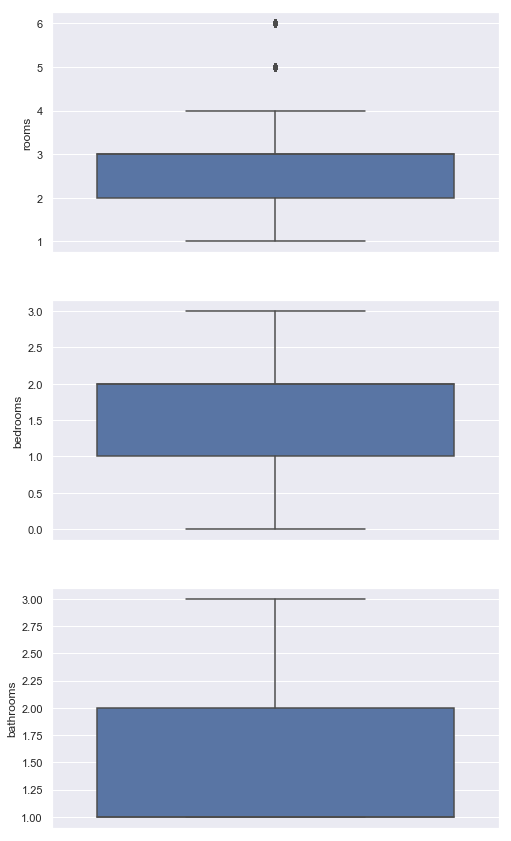

In [43]:
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
sns.boxplot(data = capital_1, y = 'rooms');
plt.subplot(3,1,2)
sns.boxplot(data = capital_1, y = 'bedrooms');
plt.subplot(3,1,3)
sns.boxplot(data = capital_1, y = 'bathrooms')

Se observa un menor número de outliers en todas las variables tratadas. Las dimensiones finales del dataset tras esto es de 73268 filas con 19 columnas.

### Rango de precios
el rango de precios también es muy grande y se debe filtrar

In [44]:
#Precio promedio en cada barrio
capital_1.groupby('barrio')['price'].mean()

barrio
Abasto                  160401.777174
Agronomía               168466.636986
Almagro                 170049.881866
Balvanera               131999.882891
Barracas                187236.923478
Barrio Norte            250079.489354
Belgrano                284227.081955
Boca                    109255.919679
Boedo                   135847.317365
Caballito               187658.732984
Catalinas               166200.000000
Centro / Microcentro    135679.254464
Chacarita               162019.774624
Coghlan                 200690.788136
Colegiales              202733.914075
Congreso                136831.680357
Constitución             94844.378082
Flores                  158720.416974
Floresta                133019.053206
Las Cañitas             325020.883677
Liniers                 145556.896552
Mataderos               144287.993377
Monserrat               131788.413110
Monte Castro            139138.864151
Nuñez                   244256.692857
Once                    130515.651017
Paler

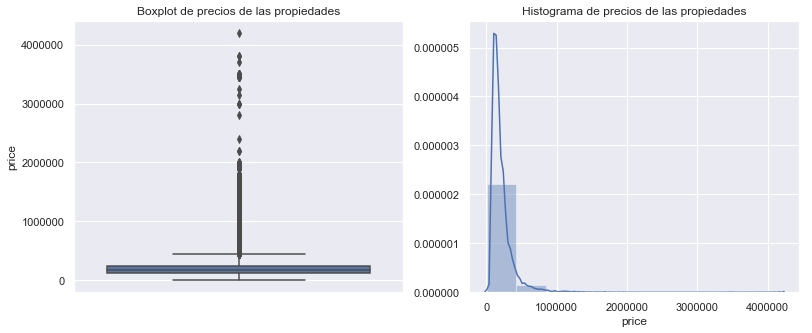

In [45]:
# Qué precios tienen las propiedades 
plt.figure(figsize = (13,5))

plt.subplot(1, 2, 1);
plt.title('Boxplot de precios de las propiedades');

ax1 = sns.boxplot(data = capital_1, y = "price");


plt.subplot(1, 2, 2);
plt.title('Histograma de precios de las propiedades');
ax2 = sns.distplot(capital_1["price"], bins = 10);


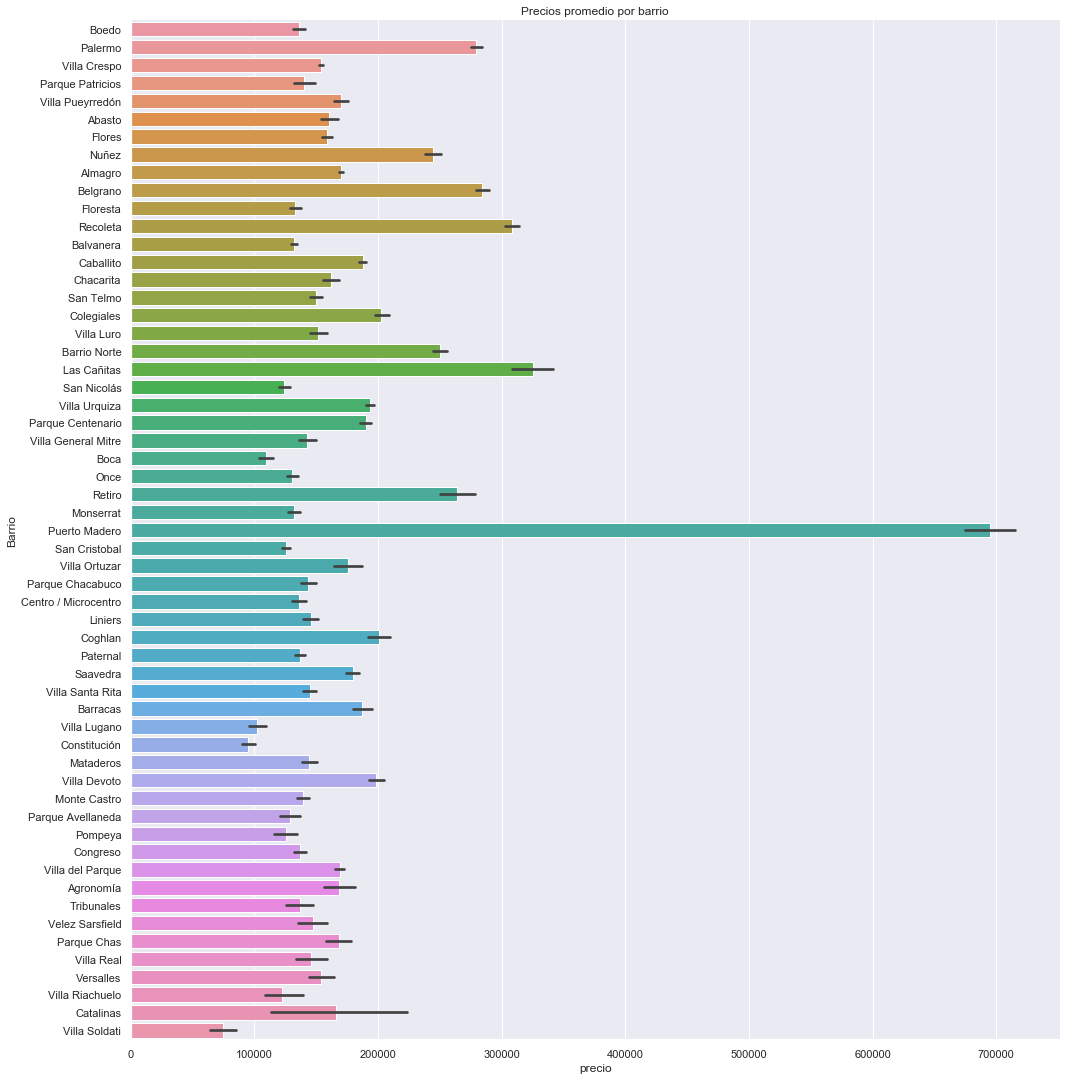

In [46]:
#precio por barrio
sns.catplot(data = capital_1, y='barrio', x='price', kind = 'bar', height = 15)
plt.title('Precios promedio por barrio')
plt.ylabel('Barrio')
plt.xlabel('precio')
plt.show()

Existen algunos barrios con valores atípicos que se deberían remover. Se puede aplicar la misma función definida anteriormente.

In [47]:
#Se define una función que elimine los datos atípicos por el método del rango intercuartílico. 
def elim_outliers_price(data):
    q1 = capital_1['price'].quantile(0.25)           #se define le primer cuartil
    q3 = capital_1['price'].quantile(0.75)           #se define el tercer cuartil
    riq = q3 - q1                                        #se define el rango intercuartílico
    
    lim_inferior = q1 - (riq * 1.5)                      #se define el límite inferior a partir del cual se descartan los datos
    lim_superior = q3 + (riq * 1.5)                      #se define el límite superior a partir del cual se descartan los datos
    
    return np.where((data > lim_inferior) & (data < lim_superior))    #Devuelve los ítems que se encuentran entre el límite inferior y el superior


In [48]:
# Se aplica la función al set de datos y se guarda en una nueva variable
capital_2 = capital_1.iloc[elim_outliers_price(capital_1.price)]

In [49]:
capital_2.head()

,start_date,end_date,created_on,lat,lon,pais,region,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


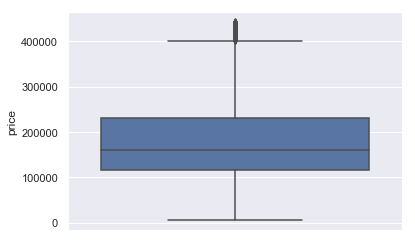

In [50]:
# Se vuelve a hacer el boxplot para comprobar que los outliers se eliminaron 
sns.boxplot(data = capital_2, y = 'price');

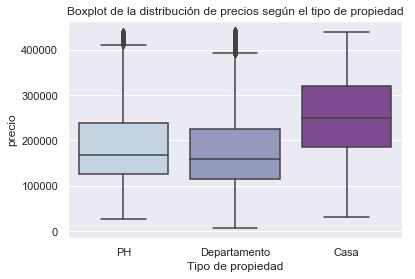

In [51]:
# Separando el precio según el tipo de propiedad se tiene:
sns.boxplot(data = capital_2, y = 'price', x = 'property_type', palette = 'BuPu');
plt.title('Boxplot de la distribución de precios según el tipo de propiedad')
plt.ylabel('precio');
plt.xlabel('Tipo de propiedad');

In [52]:
#Las nuevas dimensiones del dataset
capital_2.shape

(68512, 19)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [53]:
# Correlación de a pares de las variables cuantitativas
capital_2.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.105380,-0.061486,-0.067146,0.062050,-0.049148,-0.016681,0.270255
lon,-0.105380,1.000000,0.018230,0.020814,0.011481,-0.061087,-0.002021,0.055321
rooms,-0.061486,0.018230,1.000000,0.926632,0.495285,0.710361,0.196385,0.587428
bedrooms,-0.067146,0.020814,0.926632,1.000000,0.501033,0.691558,0.191772,0.572677
bathrooms,0.062050,0.011481,0.495285,0.501033,1.000000,0.540904,0.146749,0.599380
surface_total,-0.049148,-0.061087,0.710361,0.691558,0.540904,1.000000,0.233902,0.703697
surface_covered,-0.016681,-0.002021,0.196385,0.191772,0.146749,0.233902,1.000000,0.187207
price,0.270255,0.055321,0.587428,0.572677,0.599380,0.703697,0.187207,1.000000


### Pairplot
Después de observar las correlaciones anteriores, las relaciones se pueden evidenciar con un pairplot con una segregación según el tipo de propiedad.

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


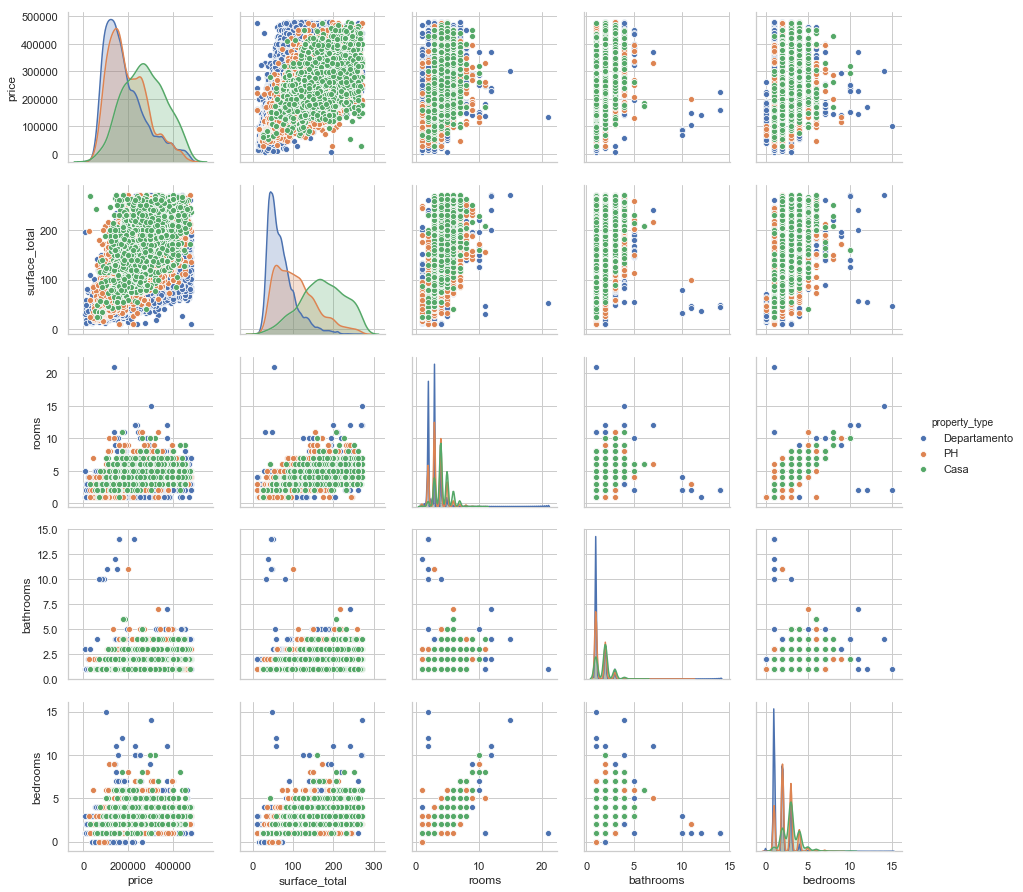

In [33]:
sns.pairplot(
    capital_2, 
    x_vars=['price', 'surface_total', 'rooms', 'bathrooms', 'bedrooms'], 
    y_vars = ['price', 'surface_total', 'rooms', 'bathrooms', 'bedrooms'],
    hue='property_type'
);

La correlación es más fácilmente visible con un heatmap:

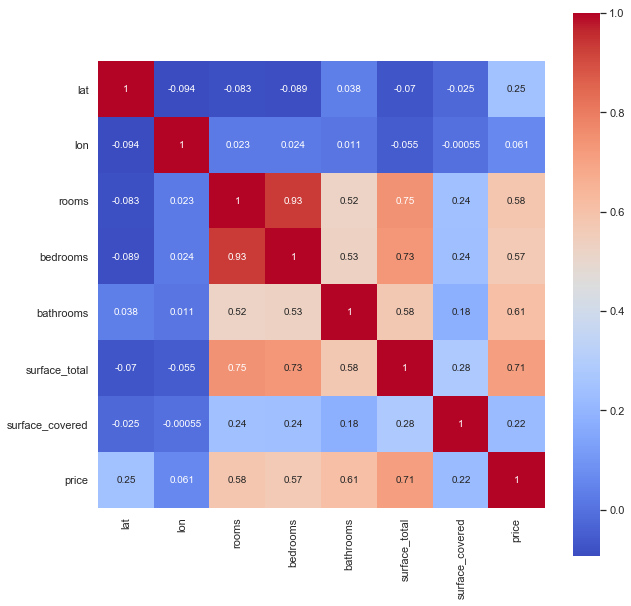

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(capital_2.corr(), cmap = 'coolwarm', annot = True, cbar = True, square = True, );

In [35]:
#La correlación según el tipo de propiedad:
capital_2.groupby('property_type').corr()

lat       lon     rooms  bedrooms  \
property_type                                                           
Casa          lat              1.000000 -0.088105 -0.103246 -0.117080   
              lon             -0.088105  1.000000  0.058607  0.032659   
              rooms           -0.103246  0.058607  1.000000  0.879708   
              bedrooms        -0.117080  0.032659  0.879708  1.000000   
              bathrooms        0.009649 -0.009694  0.365070  0.384917   
              surface_total   -0.109729 -0.034792  0.455671  0.416883   
              surface_covered -0.016878  0.039264  0.171218  0.172664   
              price            0.377737 -0.162196  0.290115  0.274003   
Departamento  lat              1.000000 -0.154481 -0.028169 -0.037349   
              lon             -0.154481  1.000000  0.087505  0.082506   
              rooms           -0.028169  0.087505  1.000000  0.927905   
              bedrooms        -0.037349  0.082506  0.927905  1.000000   
              bathrooms        0.061075  0.035135  0.526587  0.536410   
              surface_total    0.027689  0.065147  0.749103  0.738190   
              surface_covered -0.002677  0.024940  0.219053  0.218069   
              price            0.269721  0.096039  0.594340  0.574401   
PH            lat              1.000000 -0.034647 -0.051559 -0.054863   
              lon             -0.034647  1.000000  0.141578  0.152343   
              rooms           -0.051559  0.141578  1.000000  0.933704   
              bedrooms        -0.054863  0.152343  0.933704  1.000000   
              bathrooms        0.053211  0.051599  0.483558  0.468693   
              surface_total   -0.079181 -0.043459  0.660763  0.625596   
              surface_covered -0.018789  0.021706  0.219347  0.200926   
              price            0.291469  0.083277  0.562080  0.553100   

                               bathrooms  surface_total  surface_covered  \
property_type                                                              
Casa          lat               0.009649      -0.109729        -0.016878   
              lon              -0.009694      -0.034792         0.039264   
              rooms             0.365070       0.455671         0.171218   
              bedrooms          0.384917       0.416883         0.172664   
              bathrooms         1.000000       0.341045         0.120530   
              surface_total     0.341045       1.000000         0.213327   
              surface_covered   0.120530       0.213327         1.000000   
              price             0.375144       0.478348         0.137227   
Departamento  lat               0.061075       0.027689        -0.002677   
              lon               0.035135       0.065147         0.024940   
              rooms             0.526587       0.749103         0.219053   
              bedrooms          0.536410       0.738190         0.218069   
              bathrooms         1.000000       0.625364         0.174179   
              surface_total     0.625364       1.000000         0.262727   
              surface_covered   0.174179       0.262727         1.000000   
              price             0.617776       0.774472         0.216230   
PH            lat               0.053211      -0.079181        -0.018789   
              lon               0.051599      -0.043459         0.021706   
              rooms             0.483558       0.660763         0.219347   
              bedrooms          0.468693       0.625596         0.200926   
              bathrooms         1.000000       0.486113         0.162132   
              surface_total     0.486113       1.000000         0.238102   
              surface_covered   0.162132       0.238102         1.000000   
              price             0.541670       0.650610         0.190447   

                                  price  
property_type                            
Casa          lat              0.377737  
              lon             -0.1

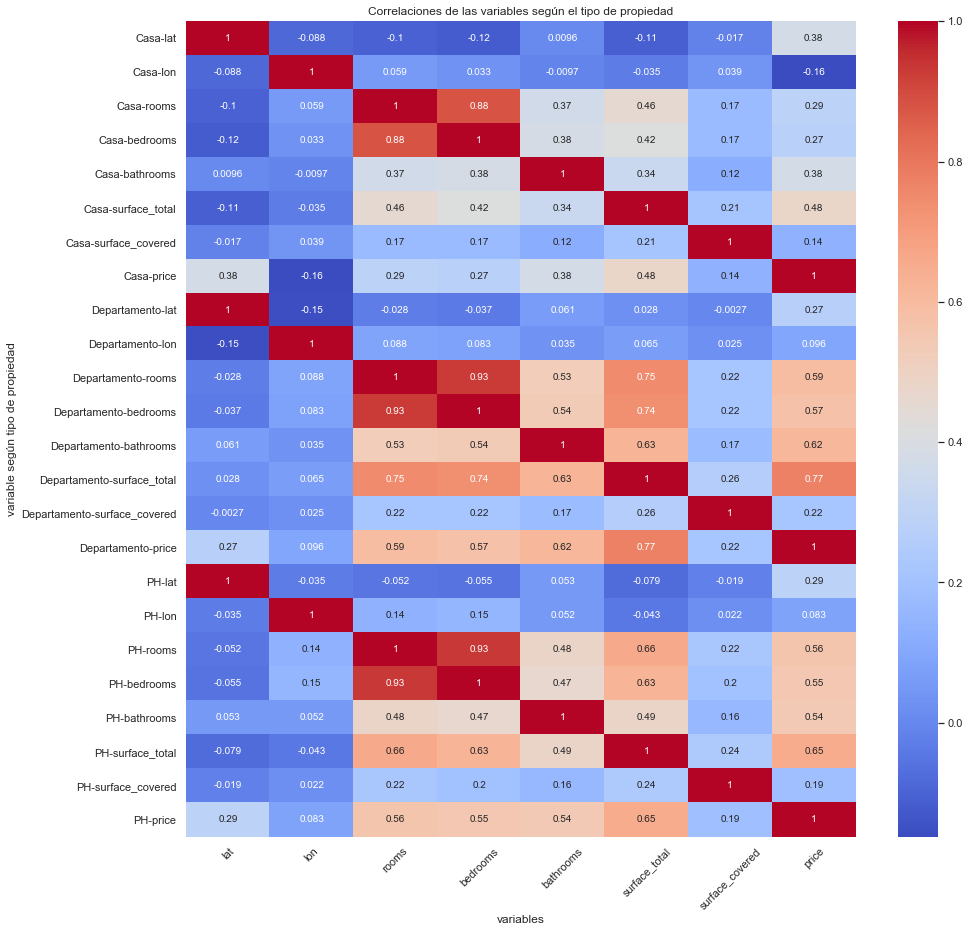

In [36]:
plt.figure(figsize = (15,15))
sns.heatmap(capital_2.groupby('property_type').corr(), cmap = 'coolwarm', annot = True, cbar = True);
plt.title('Correlaciones de las variables según el tipo de propiedad');
plt.xlabel('variables');
plt.xticks(rotation=45);
plt.ylabel('variable según tipo de propiedad');

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


 - ¿Cuáles son las variables qué más afectan el precio?
 - ¿Cómo son las características de las propiedades de mayor precio comparadas con las de menor precio?
 
 Para responder la primera pregunta es útil analizar el correlograma y ver aquellas variables con una alta correlación con respecto a precio. Entonces, para el precio de los tres tipos de propiedades la variable con más peso sería superficie total, seguido de rooms y bedrooms.

Para responder la segunda pregunta se necesita identificar las propiedades con mayor y menos precio

In [146]:
capital_2.loc[capital_2['price'].idxmax()]

start_date                                                2019-05-20
end_date                                                  2019-11-17
created_on                                                2019-05-20
lat                                                          -34.572
lon                                                         -58.4426
pais                                                       Argentina
region                                               Capital Federal
barrio                                                      Belgrano
rooms                                                              5
bedrooms                                                           4
bathrooms                                                          3
surface_total                                                    194
surface_covered                                                  176
price                                                         479000
currency                          

In [147]:
capital_2.loc[capital_2['price'].idxmin()]

start_date                                                2019-11-06
end_date                                                  2019-12-23
created_on                                                2019-11-06
lat                                                              NaN
lon                                                              NaN
pais                                                       Argentina
region                                               Capital Federal
barrio                                                 Puerto Madero
rooms                                                              5
bedrooms                                                           3
bathrooms                                                          3
surface_total                                                    195
surface_covered                                                  195
price                                                           6000
currency                          

Se ve entonces que la propiedad con mayor precio de este dataset se ubica en el barrio Belgrano de Capital Federal, es un departamento  y consta de 5 habitaciones, 4 cuartos y 3 baños. Su superficie total es de 194 y la cuvierta es de 176 lo que concuerda con la descripción que indica que tiene cochera. Su valor es de 479000 dólares.

Por otro lado la propiedad con menor precio de este dataset es un departamento ubicado en Puerto Madero, de Capital Federal, que cuenta con 5 habitaciones, 3 cuartos y 3 baños. Su superficie cubierta es igual a la total, de 195 y tiene un valor de 6000 dólares. 


Estos son las propiedades con precio máximo y mínimo del set de datos filtrado con los parámetros anteriores. Sin embargo, estas propiedades serán diferentes a las propiedades con valor máximo y mínimo del dataset inicial. 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [57]:
# Carga del dataset
datos = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

# Se cambian los nombres de algunas columnas
datos = datos.rename(columns={'l1': 'pais', 'l2': 'region', 'l3': 'barrio'})

# selección de columnas a utilizar
datos = datos.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'pais', 'currency', 'title', 'description', 'operation_type'], axis=1)


In [58]:
print(datos.shape)
datos.head()

(146660, 9)


,region,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


In [59]:
# Selección de los tipos de propiedades Casa, Departamento y PH en Capital Federal
capfed = datos[datos.region.isin(['Capital Federal']) & datos.property_type.isin(['Casa', 'Departamento', 'PH'])]
print(capfed.shape)
capfed.head()

(91485, 9)


,region,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [60]:
#Filtrado de datos de superficie total y superficie cuvierta inconsistentes 
capfd = capfed[(capfed['surface_total'] <= 1000) & (capfed['surface_total']>=15)]

capfd = capfd[capfd['price'] <= 4000000]

In [61]:
print(capfd.shape)
capfd.describe()

(82373, 9)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,82373.000000,82373.000000,81493.000000,82373.000000,81856.000000,8.237300e+04
mean,3.006810,2.000413,1.553495,95.239714,84.835736,2.628461e+05
std,1.308269,1.051184,0.852610,77.258098,155.464754,2.976546e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.799000e+05
75%,4.000000,3.000000,2.000000,110.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


In [62]:
# Selección de columnas a utilizar
capi_fd = capfd.drop(['region', 'property_type', 'barrio'], axis=1)
print(capi_fd.shape)
capi_fd.head()

(82373, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [63]:
# Muestra el conteo de valores faltantes por cada columna
capi_fd.isnull().sum()

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [64]:
# Se descartan las instancias sin datos en alguna de las columnas

capi_fd = capi_fd.dropna(axis=0)
capi_fd.shape

(81019, 6)

### Primer modelo de Machine Learning: Vecios más cercanos y Árboles de decisión

In [65]:
#Se define la matriz X con los features y el vector y con las instancias

X = capi_fd.iloc[:, 0:4]
y = capi_fd.iloc[:,5]

In [66]:
#Imprime las primeras 5 filas de X y y para comprobar

print("primeras 5 instancias de X")
print(X.head())
print("primeras 5 instancias de y")
print(y.head())

primeras 5 instancias de X
   rooms  bedrooms  bathrooms  surface_total
0    7.0       7.0        2.0          140.0
1    2.0       1.0        2.0           70.0
2    2.0       1.0        1.0           45.0
3    2.0       1.0        1.0           85.0
5    2.0       1.0        1.0           56.0
primeras 5 instancias de y
0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64


In [67]:
# Se instala la librería que permite separar las matrices entre conjuntos de train y test

from sklearn.model_selection import train_test_split

# Se definen los conjuntos de muestras de la matriz X y el vector y que pertenecen al grupo de prueba, train, y al grupo test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42, shuffle=True, stratify=None)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 4) (56713,) (24306, 4) (24306,)


In [68]:
#Se importan las librerías y el clasificador
#Se va a entrenar ambos modelos a la vez, así que se importan ambas librerías
#Se entrena un modelo de regresión lineal que servirá como benshmarking

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Se crea un objeto del clasificador para cada modelo

linear_model = LinearRegression()
knn_regressor = KNeighborsRegressor(n_neighbors=7)
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

In [69]:
#Se entrenan ambos modelos y el benchmarking

linear_model.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [70]:
# Del modelo benshmark se obtiene la ordenada al origen y la pendiente de la recta predicha
print('la pendiente es: ', linear_model.coef_, 'la ordenada al origen es: ', linear_model.intercept_)

la pendiente es:  [ 12446.3052845  -62998.69183908 133639.97167842   2118.37150271] la ordenada al origen es:  -57454.990260435676


Profundidad del árbol: 3
Número de nodos terminales: 8


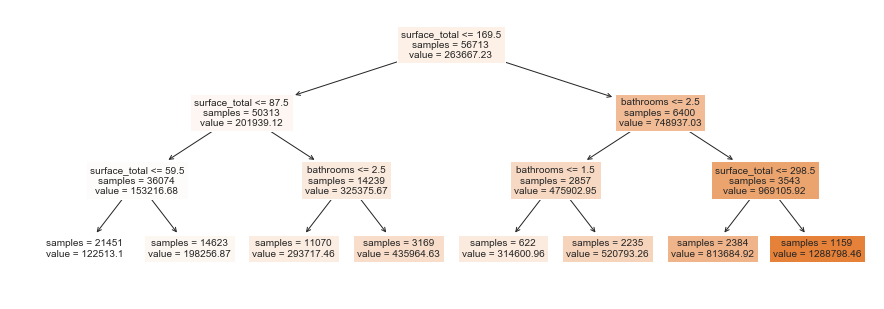

In [71]:
# Para visualizar el árbol de decisión tras en enrtenamiento se usa el tree_plot

from sklearn import tree
from sklearn.tree import plot_tree

# Estructura del árbol creado

fig, ax = plt.subplots(figsize=(15, 5))

print(f"Profundidad del árbol: {tree_regressor.get_depth()}")
print(f"Número de nodos terminales: {tree_regressor.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_regressor,
            feature_names = capi_fd.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )
plt.show()

Se muestra en cada nodo el valor medio y la cantidad de items que se agrupan en cada uno.

In [72]:
#Se predicen resultados de los modelos a analizar

y_test_knnpred = knn_regressor.predict(X_test)
y_test_treepred = tree_regressor.predict(X_test)

In [73]:
#Se evalúa la precisión del modelo según su valor de R^2 

from sklearn.metrics import r2_score

precision_knn = r2_score(y_test, y_test_knnpred)

precision_tree = r2_score(y_test, y_test_treepred)

print('La precisión del modelo de vecinos más cercanos es: ', precision_knn)
print('La predicción del modelo de árboles de decisión es:', precision_tree)

La precisión del modelo de vecinos más cercanos es:  0.6802763537958687
La predicción del modelo de árboles de decisión es: 0.5410425021388487


Por regla general, para la bondad de ajuste, entre más cercano a 1 sea el valor de R^2, mejor será el modelo.
Sin embargo, esta métrica tiene el problema de que puede tener un aumento artificial cuando se agregan predictores aunque éstos no contribuyan en nada al modelo. Por esto, se suele optar preferencialmente por el rmse que se verá a continuación.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199596.13436108344
Raíz del error cuadrático medio en Test: 202260.72646937778


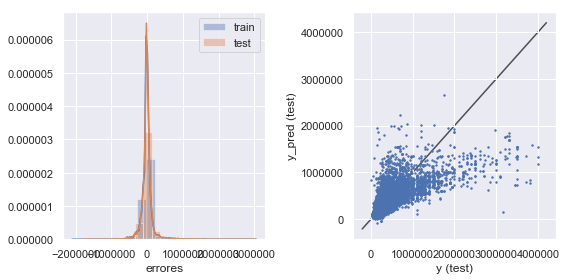

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 146638.86776947332
Raíz del error cuadrático medio en Test: 170929.1006166593


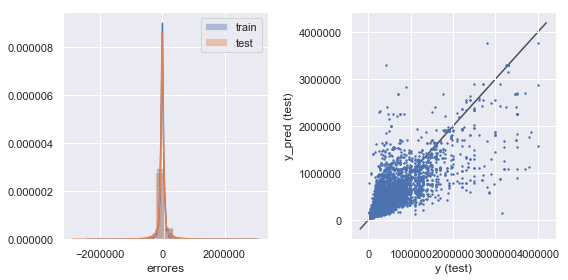

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 202993.54524281574
Raíz del error cuadrático medio en Test: 204792.88471910908


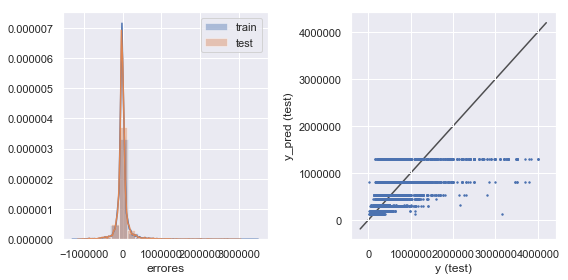

In [74]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Vecinos más cercanos', 'Árbol de Decisión']

for i, model in enumerate([linear_model ,knn_regressor, tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Se busca que la diferencia entre la predicción y el valor real, es decir el error, sea lo más bajo posible, por lo que, en este caso, el modelo de vecinos más cercanos tendría mejor rendimiento que el de árboles de decisión tanto para train como para test. 

Comparando con el modelo de regresión lineal, se ve en este una gran diferencia entre el conjunto train y el test, lo que podría indicar sobreajuste. En este caso el modelo de vecinos más cercanos sigue siendo el de mejores resultados.

Para ver la diferencia en la varianza de los datos predichos - y_pred - con los datos reales -y.

la distribución estandar de los datos reales es de:  298949.85665624373
la distribución estandar de los datos predichos con vecinos más cercanos es de:  258359.482056802
la distribución estandar de los datos predichos con árboles de decisión es de:  219851.11770567077


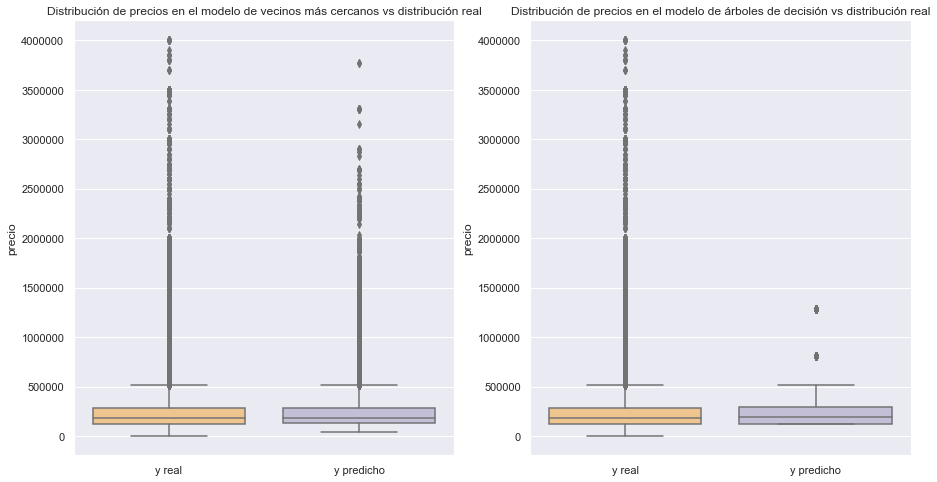

In [75]:
#boxplot comparando los datos de precios reales, y, contra los datos de precios predichos para el modelo de vecinos más cercanos

print('la distribución estandar de los datos reales es de: ', y.std())
print('la distribución estandar de los datos predichos con vecinos más cercanos es de: ', y_test_knnpred.std())
print('la distribución estandar de los datos predichos con árboles de decisión es de: ', y_test_treepred.std())


plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.boxplot(data = [y, y_test_knnpred], palette = 'PuOr');
plt.title('Distribución de precios en el modelo de vecinos más cercanos vs distribución real')
plt.ylabel('precio');
plt.xticks([0,1],['y real', 'y predicho']);

plt.subplot(1,2,2)
sns.boxplot(data = [y, y_test_treepred], palette = 'PuOr');
plt.title('Distribución de precios en el modelo de árboles de decisión vs distribución real')
plt.ylabel('precio');
plt.xticks([0,1],['y real', 'y predicho']);

Se aprecia que la distribución de precios es muy similar dentro de los límites del boxplot pero se diferencia más en los datos atípicos fuera de los bigotes de la gráfica. Esto es de esperar ya que los datos atípicos serán los de mayor dificultad de predecir sin caer en el sobreajuste. Sin embargo, se observa que el modelo de vecinos más cercanos logra predecir más de los datos atípicos que el modelo de árboles de decisión.

### Selección de hiperparámetros
Como se ve en el cálculo de la raíz del error cuadrático medio, el modelo puede ser mejorado para reducir el error y evitar el sobreajuste que se puede dar en el conjunto de train, para lo que se debe modificar los hiperparámetros. Para identificar el mejor hiperparámetro en cada modelo se realiza una exploración de valores posibles y a continuación se grafica el resultado del modelo entrenado con cada hiperparámetro en el conjunto de train y test.

In [76]:
# Para la selección de hiperparámetros en el modelo de vecinos más cercanos

# Definimos las listas vacias para los valores de accuracy deseados
lista_scoreknn_train = []
lista_scoreknn_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_scoreknn_train.append(train_acc)
    lista_scoreknn_test.append(test_acc)
    
    print('el error RMSE de k=', k, 'es: ', test_acc)

el error RMSE de k= 1 es:  183248.4076706393
el error RMSE de k= 2 es:  173695.17883440765
el error RMSE de k= 3 es:  168859.73014577842
el error RMSE de k= 4 es:  168466.4131895923
el error RMSE de k= 5 es:  168960.80200889605
el error RMSE de k= 6 es:  169714.40365182163
el error RMSE de k= 7 es:  170929.1006166593
el error RMSE de k= 8 es:  172016.0058102625
el error RMSE de k= 9 es:  172836.275290683
el error RMSE de k= 10 es:  173126.5402402987
el error RMSE de k= 11 es:  173916.709397971
el error RMSE de k= 12 es:  174511.3491503552
el error RMSE de k= 13 es:  174830.32424506792
el error RMSE de k= 14 es:  175639.46670396242
el error RMSE de k= 15 es:  176307.8986888539
el error RMSE de k= 20 es:  179458.64130508236
el error RMSE de k= 30 es:  185385.39399372818


In [77]:
# Para la selección de hiperparámetros en el modelo de árboles de decisión

# Definimos las listas vacias para los valores de accuracy deseados
lista_scoretree_train = []
lista_scoretree_test = []

# Definimos la lista de valores de k que vamos a explorar
profundidad = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30]

# Generamos un loop sobre los distintos valores de k 
for k in profundidad:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth = k, random_state = 42)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_scoretree_train.append(train_acc)
    lista_scoretree_test.append(test_acc)
    
    print('el error RMSE de profundidad=', k, 'es: ', test_acc)

el error RMSE de profundidad= 1 es:  246824.56631912984
el error RMSE de profundidad= 2 es:  219189.80785344192
el error RMSE de profundidad= 3 es:  204792.88471910908
el error RMSE de profundidad= 4 es:  196448.18441258877
el error RMSE de profundidad= 5 es:  186728.58616834946
el error RMSE de profundidad= 6 es:  182160.12723224083
el error RMSE de profundidad= 7 es:  174937.55658217394
el error RMSE de profundidad= 8 es:  170806.7273291504
el error RMSE de profundidad= 9 es:  167678.40145193238
el error RMSE de profundidad= 10 es:  163702.31226641912
el error RMSE de profundidad= 11 es:  159072.82450949284
el error RMSE de profundidad= 12 es:  157083.924953776
el error RMSE de profundidad= 13 es:  158541.24637476963
el error RMSE de profundidad= 14 es:  157627.84359513602
el error RMSE de profundidad= 15 es:  158808.6743972116
el error RMSE de profundidad= 20 es:  156473.07992500448
el error RMSE de profundidad= 30 es:  155792.08970714078


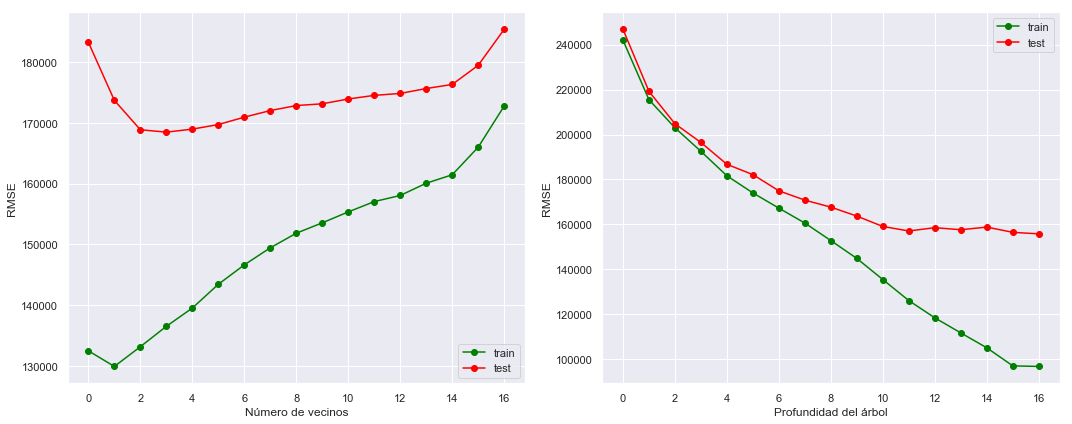

In [78]:
plt.figure(figsize =(15,6))

plt.subplot(1,2,1)
plt.plot(lista_scoreknn_train, 'o-', label='train', color='green')
plt.plot(lista_scoreknn_test,'o-',label='test', color='red')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('RMSE')

plt.subplot(1,2,2)
plt.plot(lista_scoretree_train, 'o-', label='train', color='green')
plt.plot(lista_scoretree_test,'o-',label='test', color='red')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

En esta gráfica se muestra la raíz media del error cuadrático en diferentes valores de hiperparámetros. Se espera que el error en el modelo sea el menor posible así que se busca el punto de la curva donde se tenga el mínimo valor tanto para el grupo de train como para el de test. 

Para el caso del modelo de vecinos más cercanos, el punto de valor mínimo es con 3 vecinos, aunque en este punto la diferencia entre el error obtenido con los datos de train difieren bastante de los de test. Por esta razón se escoge un valor de 9 que, aunque tiene menor desempeño en test, sigue siendo uno de los puntos más bajos, con la ventja de que la diferencia con su correspondiente en train no es tan grande.

Para el caso de la profundidad del árbol de decisión, el valor 10 parece el adecuado ya que en el conjunto de test se obtiene uno de los errores más bajos y no está muy distanciado del error obtenido con el train, por lo que el sobreajuste es menor.

### Modelos con hiperparámetros optimizados

In [83]:
#Se optimizan los hiperparámetros con número de vecinos = 4 y profundidad del árbol = 10

knn_regressor = KNeighborsRegressor(n_neighbors=8)
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

In [84]:
#Se vuelve a entrenar los modelos 

knn_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 149446.76602967305
Raíz del error cuadrático medio en Test: 172016.0058102625


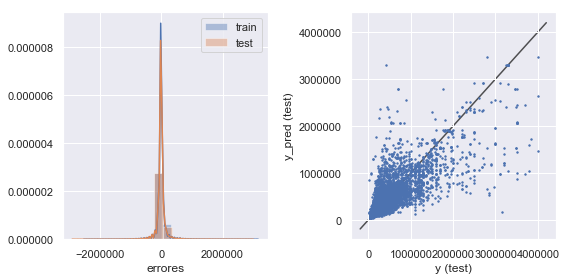

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 144845.63506534375
Raíz del error cuadrático medio en Test: 163702.31226641912


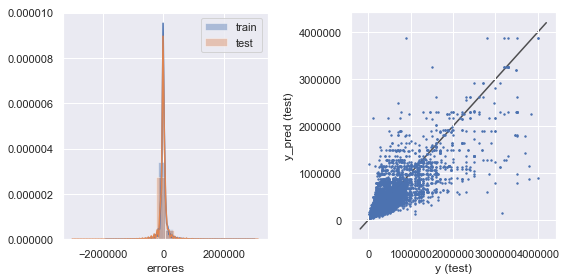

In [85]:
#Se calcula el la raíz cuadrática del error medio RMSE para los dos modelos

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Vecinos más cercanos', 'Árbol de Decisión']

for i, model in enumerate([knn_regressor, tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Con los hiperparámetros optimizados se observa una mejoría, especialmente en el modelo de árboles de decisión que pasó de tener un error de 202993 y 204792 pesos en train y test respectivamente, a 144845 y 163702. El error en el modelo de vecinos más cercanos aumentó con respecto al anterior modelo entrenado con 7 vecinos más cercanos tanto para train como para test. Sin embargo, destaca que aunque los datos son mayores, la diferencia entre los errores de ambos gruposdisminuyó, lo cual disminuye el overfitting en el grupo de train. 

Considerando que el precio máximo que se tiene en el set de datos después de filtrar es de 4000000, y que el precio medio es de 263772, sigue siendo un error alto al ser aproximadamente la mitad de la media.

A continuación se ven las características estadísticas de los precios

In [82]:
y.describe()

count    8.101900e+04
mean     2.637725e+05
std      2.989499e+05
min      6.000000e+03
25%      1.250000e+05
50%      1.800000e+05
75%      2.800000e+05
max      4.000000e+06
Name: price, dtype: float64

### ¿Cuál modelo elegiría?

El modelo que muestra un mejor rendimiento en la predicción del precio es el de árboles de decisión, por lo que este sería el ideal para ser usado. Se debe destacar, sin embargo, que los resultados de predicción entre éste y el modelo de vecinos más cercanos no varían mucho como lo muestra el error. 

### Metodología: ¿Qué información que no se esté usando podría ser útil y cuál sobra?

Entre las variables que no fueron usadas, las que podrían mejorar el modelo son las de latitud y longitud ya que la ubicación geográfica sí puede tener una relación de importancia con el precio e incluso podría dar la misma o mayor información que la variable barrio. 

Por otra parte, de las variables usadas que no tienen gran importancia para la predicción del precio se puede identificar con el modelo de árboles de decisión, buscando la importancia de cada variable en las ramas.

In [92]:
# La importancia de cada ítem en los modelos

# Para k vecinos más cercanos:

importancia_items_tree = pd.DataFrame(
                            {'ítem': X.columns,
                             'importancia': tree_regressor.feature_importances_}
                            )

importancia_items_tree.sort_values('importancia', ascending=False)

,ítem,importancia
3,surface_total,0.720392
2,bathrooms,0.174946
1,bedrooms,0.069996
0,rooms,0.034666


Como se ve en la tabla, la importancia de las variables utilizadas en el modelo de árboles de decisión son diferentes, siendo de mayor importancia la superficie total y de menor importancia el número de cuartos. Sin embargo, todas las variables fueron utilizadas ya que ninguna tiene una importancia de 0, por lo que todas están aportando al modelo y no sobran en este. 